### ANALYSIS OF BANK DATASET : CLUSTERING AND DIMENSIONALITY REDUCTION ALGORITHMS

####OUTLINE:
  > Implementing K MEANS
  - APPLYING FORWARD FEATURE SELECTION ON KMEANS
  - KMEANS WITH Principal Component Analysis
  
  > EXPECTATION MAXIMIZATION, 
  - With Tree based dimensionality reduction
  - With Principal Component Analysis
    
  > APPLYING DIMENSIONALITY REDUCTION IN NEURAL NETWORK ALGORITHMS
  - FEATURE SELECTION : DECISION TREE
  - NEURAL NETWORK WITH PCA
    
   > APPLYING CLUSTERING RESULTS TO NEURAL NETWORK MODELS
   
   > APPLYING Expectation Maximization RESULTS TO NEURAL NETWORK MODELS

In [1]:
import numpy as np
import pandas as pd

In [2]:
#importing Bank data
#Reading the data in a pandas dataframe
bank_df= pd.read_csv("C:/Users/shwts/Documents/Machine/Assignment2/Bank_Dataset/bank-additional.csv", delimiter=";")

DATA PREPROCESSING
1. Dropping not required columns contact, month and day_of_week
2. Creating dummy variables of categorical dataset
3. Converting the target variable into 1 and 0 for yes and no respectively.
4. Null check
5. Missing value check

In [3]:
#Dropping the columns from Bank dataset
#Drop "contact" as we know it was telephonic campaign so cellphone or telephone will not add much insights
bank_df.drop('contact', axis=1, inplace=True)
# day  : last contact day of the month
# month: last contact month of year
bank_df.drop('month', axis=1, inplace=True)
bank_df.drop('day_of_week', axis=1, inplace=True)

bank_df.head(2)

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [4]:
#Converting the target variable into 1 and 0 for yes and no respectively
y_n_lookup ={'yes' : 1, 'no' : 0}
bank_df['target'] = bank_df['y'].map(lambda x: y_n_lookup[x])
bank_df.drop('y',axis=1,inplace=True)
bank_df['target'].value_counts()

0    3668
1     451
Name: target, dtype: int64

In [5]:
#Creating dummy variables of categorical dataset: BANK
for y in bank_df.columns:
  if(bank_df[y].dtype == np.float64 or bank_df[y].dtype == np.int64):
    continue
  else:
    bank_df = pd.get_dummies(bank_df, columns=[y], drop_first=True)

In [6]:
#Check for missing values: BANK
X_bank = bank_df.values
missing_values = X_bank ==np.NAN
X_bank[missing_values == True]

array([], dtype=float64)

In [7]:
#Check for NULL values: BANK
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(bank_df.isnull(),yticklabels=False,cmap='viridis')

#CREATING INDEPENDENT AND DEPENDENT VARIABLES

In [9]:
X_bank = bank_df.drop('target', axis=1).values

from sklearn.preprocessing import StandardScaler
X_grps = StandardScaler().fit_transform(X_bank)

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_bank)
data_transformed = mms.transform(X_bank)

#Print the shape of X and y
print(X_bank.shape)
print(X_grps.shape)
print(data_transformed.shape)

(4119, 39)
(4119, 39)
(4119, 39)


### Implementing K MEANS ALGORITHM

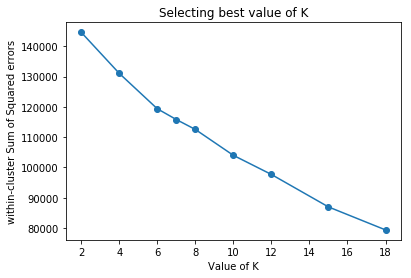

In [10]:
#K means library
from sklearn.cluster import KMeans

sse = [] #Empty list to capture Sum of Squared error calculated using Euclidean distance at different values of K
K = [2,4,6,7,8,10,12,15,18]

for k in K:
    kmeans = KMeans(n_clusters = k, random_state=4)
    kmeans.fit(X_grps)
    sse.append(kmeans.inertia_)

plt.plot(K, sse, marker='o')
plt.xlabel('Value of K')
plt.ylabel('within-cluster Sum of Squared errors')
plt.title('Selecting best value of K')
plt.show()

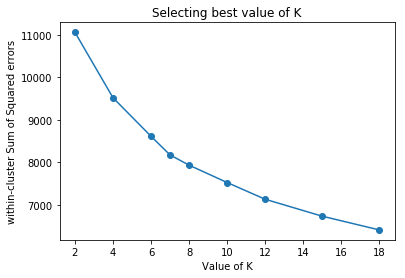

In [11]:
#K means library
from sklearn.cluster import KMeans

sse = [] #Empty list to capture Sum of Squared error calculated using Euclidean distance at different values of K
K = [2,4,6,7,8,10,12,15,18]

for k in K:
    kmeans = KMeans(n_clusters = k, random_state=4)
    kmeans.fit(data_transformed)
    sse.append(kmeans.inertia_)

plt.plot(K, sse, marker='o')
plt.xlabel('Value of K')
plt.ylabel('within-cluster Sum of Squared errors')
plt.title('Selecting best value of K')
plt.show()

In [12]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_grps )
  cluster_errors.append( clusters.inertia_ )

In [13]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [14]:
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,160641.000000
1,2,144605.615138
2,3,135643.572088
3,4,131503.229766
4,5,123481.270513
5,6,119763.965615
6,7,117594.661882
7,8,112872.390814
8,9,108476.766815


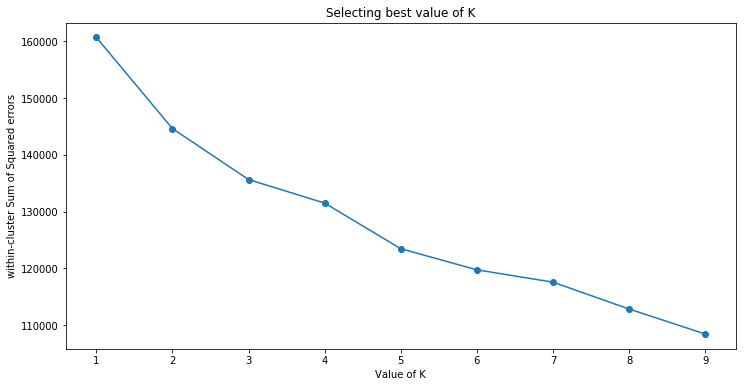

In [15]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('Value of K')
plt.ylabel('within-cluster Sum of Squared errors')
plt.title('Selecting best value of K')
plt.show()

### EXPECTATION MAXIMIZATION

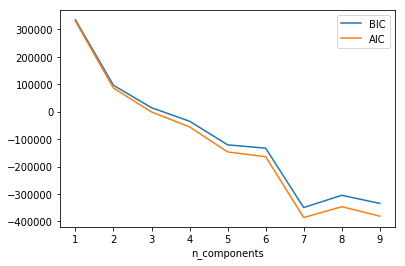

In [16]:
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_grps)
          for n in n_components]

plt.plot(n_components, [m.bic(X_grps) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_grps) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [17]:
#For STUDENT
lg_df_dep = bank_df['target']
lg_df_ind = bank_df.drop(['target'], axis=1)

X_bank = lg_df_ind.values
y_bank = lg_df_dep

### APPLYING FORWARD FEATURE SELECTION ON KMEANS

(4119, 39)


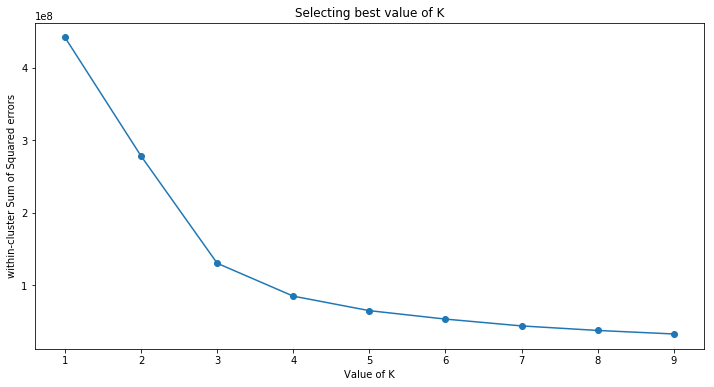

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
print(X_bank.shape)

clf = ExtraTreesClassifier(n_estimators=50,random_state=4)
clf = clf.fit(X_bank, y_bank)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_bank)
X_new.shape     

#FEATURE SELECTION ALGORITHM : 
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,random_state=4 )
  clusters.fit( X_new )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('Value of K')
plt.ylabel('within-cluster Sum of Squared errors')
plt.title('Selecting best value of K')
plt.show()





### KMEANS WITH PCA

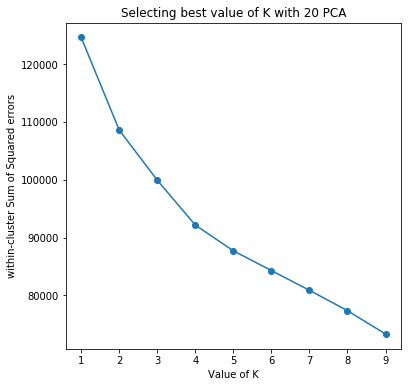

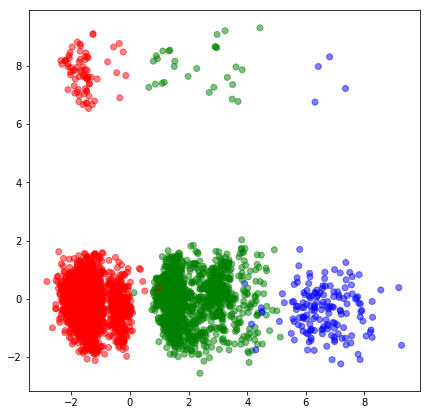

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
x_20d = pca.fit_transform(X_grps)

cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( x_20d )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.figure(figsize=(6,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('Value of K')
plt.ylabel('within-cluster Sum of Squared errors')
plt.title('Selecting best value of K with 20 PCA')
plt.show()

#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_20d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_20d[:,0],x_20d[:,2], c= label_color, alpha=0.5) 
plt.show()

### EXPECTION MAXIMIZATION : Tree based dimensionality reduction

(4119, 39)
(4119, 11)


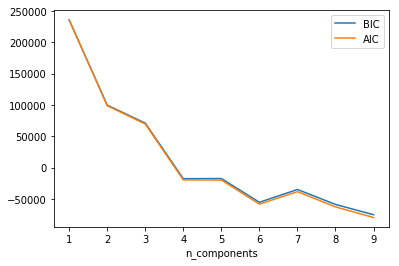

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
print(X_bank.shape)

clf = ExtraTreesClassifier(n_estimators=50,random_state=42)
clf = clf.fit(X_bank, y_bank)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_bank)
print(X_new.shape)     

n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_new)
          for n in n_components]

plt.title("")
plt.plot(n_components, [m.bic(X_new) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_new) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');



### EXPECTATION MAXIMIZATION WITH PCA

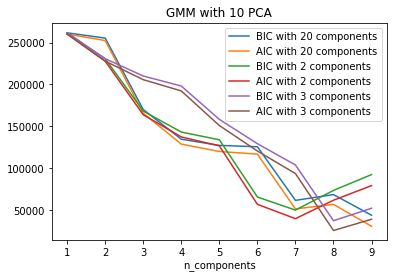

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
x_20d = pca.fit_transform(X_grps)

n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(x_20d)
          for n in n_components]

plt.plot(n_components, [m.bic(x_20d) for m in models], label='BIC with 20 components')
plt.plot(n_components, [m.aic(x_20d) for m in models], label='AIC with 20 components')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.title('GMM with PCA')
#plt.show()

###############################################
pca10 = PCA(n_components=2)
x_2d = pca.fit_transform(X_grps)

n_components = np.arange(1, 10)
models1 = [GaussianMixture(n, covariance_type='full', random_state=0).fit(x_2d)
          for n in n_components]

plt.plot(n_components, [m.bic(x_2d) for m in models1], label='BIC with 2 components')
plt.plot(n_components, [m.aic(x_2d) for m in models1], label='AIC with 2 components')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.title('GMM with 10 PCA')
#plt.show()

pca10 = PCA(n_components=3)
x_3d = pca.fit_transform(X_grps)

n_components = np.arange(1, 10)
models2 = [GaussianMixture(n, covariance_type='full', random_state=0).fit(x_3d)
          for n in n_components]

plt.plot(n_components, [m.bic(x_3d) for m in models2], label='BIC with 3 components')
plt.plot(n_components, [m.aic(x_3d) for m in models2], label='AIC with 3 components')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.title('GMM with 10 PCA')
plt.show()

### APPLYING DIMENSIONALITY REDUCTION IN NEURAL NETWORK ALGORITHMS

#### FEATURE SELECTION : DECISION TREE

In [42]:
#Creating new X based on components
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
print(X_bank.shape)

clf = ExtraTreesClassifier(n_estimators=50,random_state=4)
clf = clf.fit(X_bank, y_bank)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_bank)
X_new.shape     

(4119, 39)


(4119, 11)

In [43]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_bank, test_size=0.2, random_state=42)

In [44]:
#Initializing Neural Network
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

#Initializing Neural Network
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer='uniform', activation = 'relu', input_dim = 11))  #first hidden layer
classifier.add(Dense(units = 6, kernel_initializer='uniform', activation = 'relu')) #second hidden layer
classifier.add(Dense(units = 4, kernel_initializer='uniform', activation = 'relu')) #third hidden layer
classifier.add(Dense(units = 1, activation = 'sigmoid')) #output layer
# Compiling Neural Network
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'],)

# Fitting our model 
model = classifier.fit(X_train, y_train, epochs = 100, shuffle=False)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

score = classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/100
3295/3295 [==============================] - 0s 127us/step - loss: 0.6269 - acc: 0.8910
Epoch 2/100
3295/3295 [==============================] - 0s 47us/step - loss: 0.5297 - acc: 0.8910
Epoch 3/100
3295/3295 [==============================] - 0s 65us/step - loss: 0.4699 - acc: 0.8910
Epoch 4/100
3295/3295 [==============================] - 0s 51us/step - loss: 0.4319 - acc: 0.8910
Epoch 5/100
3295/3295 [==============================] - 0s 45us/step - loss: 0.4069 - acc: 0.8910
Epoch 6/100
3295/3295 [==============================] - 0s 52us/step - loss: 0.3900 - acc: 0.8910
Epoch 7/100
3295/3295 [==============================] - 0s 49us/step - loss: 0.3782 - acc: 0.8910
Epoch 8/100
3295/3295 [==============================] - 0s 50us/step - loss: 0.3697 - acc: 0.8910
Epoch 9/100
3295/3295 [==============================] - 0s 47us/step - loss: 0.3636 - acc: 0.8910
Epoch 10/100
3295/3295 [==============================] - 0s 46us/step - loss: 0.3592 - acc: 0.8910
Epoch 11

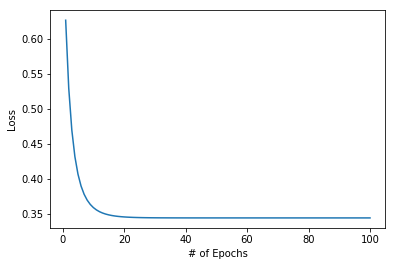

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
acc=model.history['loss']
#val_acc=model.history['val_acc']
epoch=range(1,len(acc)+1)
plt.figure()
plt.xlabel("# of Epochs")
plt.ylabel("Loss")
plt.plot(epoch,acc)

### NEURAL NETWORK WITH PCA

In [47]:
model_pca_bank = decomposition.PCA(n_components=2, random_state=4).fit(X_grps)
X_pca = model_pca_bank.fit_transform(X_grps)
print("Shape of input", X_grps.shape)
print("Shape of PCA component", projected_pca.shape)
print("Explained Variance", model_pca_bank.explained_variance_ratio_)

Shape of input (4119, 39)
Shape of PCA component (4119, 2)
Explained Variance [0.12116422 0.06027033]


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_bank, test_size=0.2, random_state=42)

In [49]:
#Initializing Neural Network
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

#Initializing Neural Network
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer='uniform', activation = 'relu', input_dim = 2))  #first hidden layer
classifier.add(Dense(units = 6, kernel_initializer='uniform', activation = 'relu')) #second hidden layer
classifier.add(Dense(units = 4, kernel_initializer='uniform', activation = 'relu')) #third hidden layer
classifier.add(Dense(units = 1, activation = 'sigmoid')) #output layer
# Compiling Neural Network
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'],)

# Fitting our model 
model = classifier.fit(X_train, y_train, epochs = 100, shuffle=False)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

score = classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/100
3295/3295 [==============================] - 1s 305us/step - loss: 0.5545 - acc: 0.8892
Epoch 2/100
3295/3295 [==============================] - 0s 66us/step - loss: 0.4157 - acc: 0.8910
Epoch 3/100
3295/3295 [==============================] - 0s 62us/step - loss: 0.3704 - acc: 0.8910
Epoch 4/100
3295/3295 [==============================] - 0s 78us/step - loss: 0.3543 - acc: 0.8910
Epoch 5/100
3295/3295 [==============================] - 0s 68us/step - loss: 0.3483 - acc: 0.8910
Epoch 6/100
3295/3295 [==============================] - 0s 61us/step - loss: 0.3459 - acc: 0.8910
Epoch 7/100
3295/3295 [==============================] - 0s 60us/step - loss: 0.3450 - acc: 0.8910
Epoch 8/100
3295/3295 [==============================] - 0s 58us/step - loss: 0.3446 - acc: 0.8910
Epoch 9/100
3295/3295 [==============================] - 0s 61us/step - loss: 0.3444 - acc: 0.8910
Epoch 10/100
3295/3295 [==============================] - 0s 74us/step - loss: 0.3444 - acc: 0.8910
Epoch 11

Epoch 82/100
3295/3295 [==============================] - 0s 72us/step - loss: 0.2974 - acc: 0.8910
Epoch 83/100
3295/3295 [==============================] - 0s 75us/step - loss: 0.2973 - acc: 0.8910
Epoch 84/100
3295/3295 [==============================] - 0s 60us/step - loss: 0.2972 - acc: 0.8910
Epoch 85/100
3295/3295 [==============================] - 0s 56us/step - loss: 0.2971 - acc: 0.8910
Epoch 86/100
3295/3295 [==============================] - 0s 62us/step - loss: 0.2969 - acc: 0.8910
Epoch 87/100
3295/3295 [==============================] - 0s 63us/step - loss: 0.2968 - acc: 0.8910
Epoch 88/100
3295/3295 [==============================] - 0s 62us/step - loss: 0.2967 - acc: 0.8910
Epoch 89/100
3295/3295 [==============================] - 0s 58us/step - loss: 0.2966 - acc: 0.8910
Epoch 90/100
3295/3295 [==============================] - 0s 64us/step - loss: 0.2964 - acc: 0.8910
Epoch 91/100
3295/3295 [==============================] - 0s 62us/step - loss: 0.2963 - acc: 0.8910


In [50]:
### BASELINE MODEL
#Initializing Neural Network
# Importing the Keras libraries and packages
X_train, X_test, y_train, y_test = train_test_split(X_bank, y_bank, test_size=0.2, random_state=42)

import keras
from keras.models import Sequential
from keras.layers import Dense

#Initializing Neural Network
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer='uniform', activation = 'relu', input_dim = 39))  #first hidden layer
classifier.add(Dense(units = 6, kernel_initializer='uniform', activation = 'relu')) #second hidden layer
classifier.add(Dense(units = 4, kernel_initializer='uniform', activation = 'relu')) #third hidden layer
classifier.add(Dense(units = 1, activation = 'sigmoid')) #output layer
# Compiling Neural Network
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'],)

# Fitting our model 
model = classifier.fit(X_train, y_train, epochs = 100, shuffle=False)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

score = classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/100
3295/3295 [==============================] - 1s 183us/step - loss: 0.6295 - acc: 0.8819
Epoch 2/100
3295/3295 [==============================] - 0s 53us/step - loss: 0.5294 - acc: 0.8910
Epoch 3/100
3295/3295 [==============================] - 0s 47us/step - loss: 0.4698 - acc: 0.8910
Epoch 4/100
3295/3295 [==============================] - 0s 55us/step - loss: 0.4318 - acc: 0.8910
Epoch 5/100
3295/3295 [==============================] - 0s 53us/step - loss: 0.4068 - acc: 0.8910
Epoch 6/100
3295/3295 [==============================] - 0s 67us/step - loss: 0.3899 - acc: 0.8910
Epoch 7/100
3295/3295 [==============================] - 0s 58us/step - loss: 0.3781 - acc: 0.8910
Epoch 8/100
3295/3295 [==============================] - 0s 52us/step - loss: 0.3697 - acc: 0.8910
Epoch 9/100
3295/3295 [==============================] - 0s 50us/step - loss: 0.3636 - acc: 0.8910
Epoch 10/100
3295/3295 [==============================] - 0s 45us/step - loss: 0.3591 - acc: 0.8910
Epoch 11

### NEURAL NETWORK WITH PCA-20

In [54]:
model_pca_bank = decomposition.PCA(n_components=20, random_state=4).fit(X_grps)
X_pca = model_pca_bank.fit_transform(X_grps)
print("Shape of input", X_grps.shape)
print("Shape of PCA component", X_pca.shape)
print("Explained Variance", model_pca_bank.explained_variance_ratio_)

Shape of input (4119, 39)
Shape of PCA component (4119, 20)
Explained Variance [0.12116422 0.06027067 0.05453413 0.05196985 0.04701721 0.04221975
 0.04150788 0.03476622 0.03066209 0.02929647 0.02844576 0.02768198
 0.02734522 0.02668888 0.02644771 0.02635188 0.02513199 0.02500381
 0.02457545 0.02400321]


In [55]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_bank, test_size=0.2, random_state=42)

In [56]:
#Initializing Neural Network
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

#Initializing Neural Network
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer='uniform', activation = 'relu', input_dim = 20))  #first hidden layer
classifier.add(Dense(units = 6, kernel_initializer='uniform', activation = 'relu')) #second hidden layer
classifier.add(Dense(units = 4, kernel_initializer='uniform', activation = 'relu')) #third hidden layer
classifier.add(Dense(units = 1, activation = 'sigmoid')) #output layer
# Compiling Neural Network
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'],)

# Fitting our model 
model = classifier.fit(X_train, y_train, epochs = 100, shuffle=False)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

score = classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/100
3295/3295 [==============================] - 1s 211us/step - loss: 0.6062 - acc: 0.8868
Epoch 2/100
3295/3295 [==============================] - 0s 50us/step - loss: 0.4875 - acc: 0.8910: 0s - loss: 0.5024 - acc: 0.89
Epoch 3/100
3295/3295 [==============================] - 0s 55us/step - loss: 0.4228 - acc: 0.8910
Epoch 4/100
3295/3295 [==============================] - 0s 47us/step - loss: 0.3872 - acc: 0.8910
Epoch 5/100
3295/3295 [==============================] - 0s 44us/step - loss: 0.3677 - acc: 0.8910
Epoch 6/100
3295/3295 [==============================] - 0s 43us/step - loss: 0.3571 - acc: 0.8910
Epoch 7/100
3295/3295 [==============================] - 0s 46us/step - loss: 0.3513 - acc: 0.8910
Epoch 8/100
3295/3295 [==============================] - 0s 44us/step - loss: 0.3481 - acc: 0.8910
Epoch 9/100
3295/3295 [==============================] - 0s 44us/step - loss: 0.3464 - acc: 0.8910
Epoch 10/100
3295/3295 [==============================] - 0s 45us/step - loss

### APPLYING CLUSTERING RESULTS TO NEURAL NETWORK MODELS

In [78]:
import time
start = time.time()
# Set random seed
np.random.seed(42)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bank, y_bank, test_size=0.2, random_state=42)

from sklearn.cluster import KMeans
clf=KMeans(n_clusters = 3, random_state=42)
clf.fit(X_train)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_labels_train = clf.labels_
y_labels_test = clf.predict(X_test)

# X_train['km'] = y_labels_train
# X_test['km'] = y_labels_test
X_train = y_labels_train
X_test = y_labels_test

#Initializing Neural Network
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

#Initializing Neural Network
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer='uniform', activation = 'relu', input_dim = 1))  #first hidden layer
classifier.add(Dense(units = 6, kernel_initializer='uniform', activation = 'relu')) #second hidden layer
classifier.add(Dense(units = 4, kernel_initializer='uniform', activation = 'relu')) #third hidden layer
classifier.add(Dense(units = 1, activation = 'sigmoid')) #output layer
# Compiling Neural Network
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'],)

# Fitting our model 
classifier.fit(X_train, y_train, epochs = 100, shuffle=False)
score = classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

score_train = classifier.evaluate(X_train, y_train, verbose=0)
print('Train loss for train:', score_train[0])
print('Train accuracy for train:', score_train[1])

end = time.time()
print(end - start)

Epoch 1/100
3295/3295 [==============================] - 1s 281us/step - loss: 0.5725 - acc: 0.8901
Epoch 2/100
3295/3295 [==============================] - 0s 54us/step - loss: 0.4360 - acc: 0.8910
Epoch 3/100
3295/3295 [==============================] - 0s 63us/step - loss: 0.3824 - acc: 0.8910
Epoch 4/100
3295/3295 [==============================] - 0s 54us/step - loss: 0.3605 - acc: 0.8910
Epoch 5/100
3295/3295 [==============================] - 0s 67us/step - loss: 0.3514 - acc: 0.8910
Epoch 6/100
3295/3295 [==============================] - 0s 62us/step - loss: 0.3475 - acc: 0.8910
Epoch 7/100
3295/3295 [==============================] - 0s 67us/step - loss: 0.3457 - acc: 0.8910
Epoch 8/100
3295/3295 [==============================] - 0s 54us/step - loss: 0.3450 - acc: 0.8910
Epoch 9/100
3295/3295 [==============================] - 0s 53us/step - loss: 0.3446 - acc: 0.8910
Epoch 10/100
3295/3295 [==============================] - 0s 65us/step - loss: 0.3445 - acc: 0.8910
Epoch 11

3295/3295 [==============================] - 0s 58us/step - loss: 0.3438 - acc: 0.8910
Epoch 84/100
3295/3295 [==============================] - 0s 49us/step - loss: 0.3438 - acc: 0.8910
Epoch 85/100
3295/3295 [==============================] - 0s 54us/step - loss: 0.3438 - acc: 0.8910
Epoch 86/100
3295/3295 [==============================] - 0s 45us/step - loss: 0.3437 - acc: 0.8910
Epoch 87/100
3295/3295 [==============================] - 0s 44us/step - loss: 0.3436 - acc: 0.8910
Epoch 88/100
3295/3295 [==============================] - 0s 42us/step - loss: 0.3436 - acc: 0.8910
Epoch 89/100
3295/3295 [==============================] - 0s 44us/step - loss: 0.3435 - acc: 0.8910
Epoch 90/100
3295/3295 [==============================] - 0s 50us/step - loss: 0.3434 - acc: 0.8910
Epoch 91/100
3295/3295 [==============================] - 0s 44us/step - loss: 0.3434 - acc: 0.8910
Epoch 92/100
3295/3295 [==============================] - 0s 56us/step - loss: 0.3433 - acc: 0.8910
Epoch 93/100


In [79]:
import time
start = time.time()
# Set random seed
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X_bank, y_bank, test_size=0.2, random_state=42)

clf=KMeans(n_clusters = 7, random_state=42)
clf.fit(X_train)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_labels_train = clf.labels_
y_labels_test = clf.predict(X_test)

# X_train['km'] = y_labels_train
# X_test['km'] = y_labels_test
X_train = y_labels_train
X_test = y_labels_test

#Initializing Neural Network
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

#Initializing Neural Network
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer='uniform', activation = 'relu', input_dim = 1))  #first hidden layer
classifier.add(Dense(units = 6, kernel_initializer='uniform', activation = 'relu')) #second hidden layer
classifier.add(Dense(units = 4, kernel_initializer='uniform', activation = 'relu')) #third hidden layer
classifier.add(Dense(units = 1, activation = 'sigmoid')) #output layer
# Compiling Neural Network
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'],)

# Fitting our model 
classifier.fit(X_train, y_train, epochs = 100, shuffle=False)
score = classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

score_train = classifier.evaluate(X_train, y_train, verbose=0)
print('Train loss for train:', score_train[0])
print('Train accuracy for train:', score_train[1])

end = time.time()
print(end - start)

Epoch 1/100
3295/3295 [==============================] - 1s 410us/step - loss: 0.5730 - acc: 0.8865
Epoch 2/100
3295/3295 [==============================] - 0s 78us/step - loss: 0.4362 - acc: 0.8910
Epoch 3/100
3295/3295 [==============================] - 0s 93us/step - loss: 0.3825 - acc: 0.8910
Epoch 4/100
3295/3295 [==============================] - 0s 74us/step - loss: 0.3606 - acc: 0.8910
Epoch 5/100
3295/3295 [==============================] - 0s 80us/step - loss: 0.3514 - acc: 0.8910
Epoch 6/100
3295/3295 [==============================] - 0s 74us/step - loss: 0.3475 - acc: 0.8910
Epoch 7/100
3295/3295 [==============================] - 0s 67us/step - loss: 0.3458 - acc: 0.8910
Epoch 8/100
3295/3295 [==============================] - 0s 50us/step - loss: 0.3450 - acc: 0.8910
Epoch 9/100
3295/3295 [==============================] - 0s 45us/step - loss: 0.3446 - acc: 0.8910
Epoch 10/100
3295/3295 [==============================] - 0s 52us/step - loss: 0.3445 - acc: 0.8910
Epoch 11

In [80]:
import time
start = time.time()
# Set random seed
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X_bank, y_bank, test_size=0.2, random_state=42)

clf=KMeans(n_clusters = 12, random_state=42)
clf.fit(X_train)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_labels_train = clf.labels_
y_labels_test = clf.predict(X_test)

# X_train['km'] = y_labels_train
# X_test['km'] = y_labels_test
X_train = y_labels_train
X_test = y_labels_test

#Initializing Neural Network
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

#Initializing Neural Network
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer='uniform', activation = 'relu', input_dim = 1))  #first hidden layer
classifier.add(Dense(units = 6, kernel_initializer='uniform', activation = 'relu')) #second hidden layer
classifier.add(Dense(units = 4, kernel_initializer='uniform', activation = 'relu')) #third hidden layer
classifier.add(Dense(units = 1, activation = 'sigmoid')) #output layer
# Compiling Neural Network
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'],)

# Fitting our model 
classifier.fit(X_train, y_train, epochs = 100, shuffle=False)
score = classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

score_train = classifier.evaluate(X_train, y_train, verbose=0)
print('Train loss for train:', score_train[0])
print('Train accuracy for train:', score_train[1])

end = time.time()
print(end - start)

Epoch 1/100
3295/3295 [==============================] - 1s 312us/step - loss: 0.5735 - acc: 0.8847
Epoch 2/100
3295/3295 [==============================] - 0s 41us/step - loss: 0.4363 - acc: 0.8910
Epoch 3/100
3295/3295 [==============================] - 0s 47us/step - loss: 0.3825 - acc: 0.8910
Epoch 4/100
3295/3295 [==============================] - 0s 45us/step - loss: 0.3606 - acc: 0.8910
Epoch 5/100
3295/3295 [==============================] - 0s 45us/step - loss: 0.3514 - acc: 0.8910
Epoch 6/100
3295/3295 [==============================] - 0s 46us/step - loss: 0.3475 - acc: 0.8910
Epoch 7/100
3295/3295 [==============================] - 0s 45us/step - loss: 0.3458 - acc: 0.8910
Epoch 8/100
3295/3295 [==============================] - 0s 46us/step - loss: 0.3450 - acc: 0.8910
Epoch 9/100
3295/3295 [==============================] - 0s 58us/step - loss: 0.3447 - acc: 0.8910
Epoch 10/100
3295/3295 [==============================] - 0s 59us/step - loss: 0.3445 - acc: 0.8910
Epoch 11

### EM models with NN

In [81]:
df = pd.DataFrame()
#KMeans
clf=KMeans(n_clusters = 3, random_state=42)
clf.fit(X_grps)
clf1=GaussianMixture(3, covariance_type='full', random_state=0)
clf1.fit(X_grps)

df['Km'] = clf.predict(X_grps)
df['GMM'] = clf1.predict(X_grps)
df.head()

,Km,GMM
0,2,1
1,1,0
2,1,2
3,1,2
4,1,2


In [82]:
import time
start = time.time()
# Set random seed
np.random.seed(42)
X_bank = df.values
X_train, X_test, y_train, y_test = train_test_split(X_bank, y_bank, test_size=0.2, random_state=42)

import keras
from keras.models import Sequential
from keras.layers import Dense

#Initializing Neural Network
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer='uniform', activation = 'relu', input_dim = 2))  #first hidden layer
classifier.add(Dense(units = 6, kernel_initializer='uniform', activation = 'relu')) #second hidden layer
classifier.add(Dense(units = 4, kernel_initializer='uniform', activation = 'relu')) #third hidden layer
classifier.add(Dense(units = 1, activation = 'sigmoid')) #output layer
# Compiling Neural Network
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'],)

# Fitting our model 
model= classifier.fit(X_train, y_train, epochs = 100, shuffle=False)
score = classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

score_train = classifier.evaluate(X_train, y_train, verbose=0)
print('Train loss for train:', score_train[0])
print('Train accuracy for train:', score_train[1])

end = time.time()
print(end - start)

Epoch 1/100
3295/3295 [==============================] - 1s 383us/step - loss: 0.6269 - acc: 0.8819
Epoch 2/100
3295/3295 [==============================] - 0s 43us/step - loss: 0.5297 - acc: 0.8910
Epoch 3/100
3295/3295 [==============================] - 0s 43us/step - loss: 0.4699 - acc: 0.8910
Epoch 4/100
3295/3295 [==============================] - 0s 56us/step - loss: 0.4319 - acc: 0.8910
Epoch 5/100
3295/3295 [==============================] - 0s 58us/step - loss: 0.4069 - acc: 0.8910
Epoch 6/100
3295/3295 [==============================] - ETA: 0s - loss: 0.3908 - acc: 0.890 - 0s 53us/step - loss: 0.3900 - acc: 0.8910
Epoch 7/100
3295/3295 [==============================] - ETA: 0s - loss: 0.3786 - acc: 0.891 - 0s 51us/step - loss: 0.3782 - acc: 0.8910
Epoch 8/100
3295/3295 [==============================] - 0s 48us/step - loss: 0.3697 - acc: 0.8910
Epoch 9/100
3295/3295 [==============================] - 0s 45us/step - loss: 0.3636 - acc: 0.8910
Epoch 10/100
3295/3295 [========

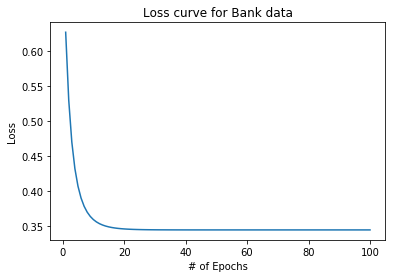

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
acc=model.history['loss']
#val_acc=model.history['val_acc']
epoch=range(1,len(acc)+1)
plt.figure()
plt.xlabel("# of Epochs")
plt.title("Loss curve for Bank data")
plt.ylabel("Loss")
plt.plot(epoch,acc)
